<class 'complex'>


/home/cychung/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


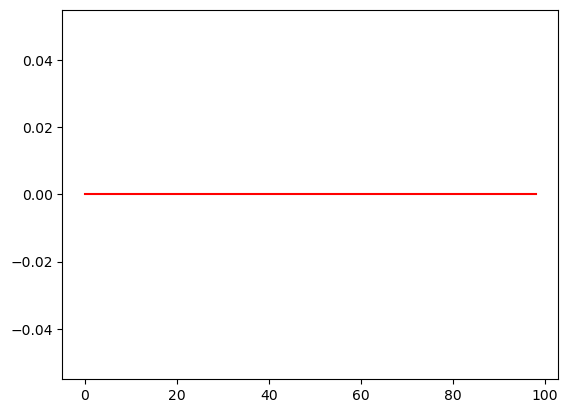

In [40]:
import pyaudio as pd
import numpy as np
import IPython.display as ipd
from scipy import signal
import math
import matplotlib.pyplot as mb

def complexNumber():
    output = []
    for j in range(1,100):
        array = 2j
        complex = array*j
        output.append(complex)
    return output

def main():
    list = complexNumber()
    
    print(type(list[0]))
    mb.plot(list, color = "red")
    mb.show()
    # readMIDI()

main()

In [ ]:
#!/usr/bin/env python
"""
Send random notes to the output port.
"""
from __future__ import print_function
import sys
import time
import random
import mido
import threading

from OSC import OSCServer
from mido import Message

#constants
ARP_UP = 1
ARP_DOWN = 2
ARP_RAND = 3

#globals
server = OSCServer( ("0.0.0.0", 7002) )
period = 1.0
note_offset = 0
arp_type = ARP_RAND
curr_note = 0

def arp_handler(addr, tags, stuff, source):
    global arp_type
    print("arp: ", stuff)
    if stuff[0] == 'up':
        arp_type = ARP_UP
    elif stuff[0] == 'down':
        arp_type = ARP_DOWN
    elif stuff[0] == 'rand':
        arp_type = ARP_RAND

def mod_handler(addr, tags, stuff, source):
    print("mod: ", stuff, " len=",len(stuff))
    global note_offset
    note_offset = stuff[0]
    print("offset = ", note_offset) 

def key_handler(addr, tags, stuff, source):
    print("key: ", stuff)
    global notes
    if (stuff[0]== 'major'):
        notes = [60, 62, 64, 65, 67, 69]
        print("MAJOR")
    elif (stuff[0] == 'penta'):
        notes = [60, 62, 64, 67, 69, 72]
        print("PENTA")
    else:
        notes = [60, 62, 63, 65, 67, 68]
        print("MINOR")

def message_handler(addr, tags, stuff, source):
    print("message: ", addr)  

def tempo_handler(addr, tags, stuff, source):
    global period
    print("tempo: ", stuff[0])
    period = stuff[0]

def get_next_note():
    global arp_type
    global curr_note
    if (arp_type == ARP_RAND):
        return random.choice(notes) + note_offset
    elif (arp_type == ARP_UP):
        curr_note =curr_note + 1;
        curr_note = curr_note%len(notes)
        return notes[curr_note] + note_offset
    elif (arp_type == ARP_DOWN):
        curr_note = curr_note - 1;
        curr_note = curr_note%len(notes)
        return notes[curr_note] + note_offset


if len(sys.argv) > 1:
    portname = sys.argv[1]
else:
    portname = None  # Use default port

# A pentatonic scale
notes = [60, 62, 64, 67, 69, 72]

server.addMsgHandler("/test", message_handler)
server.addMsgHandler("/tempo", tempo_handler)
server.addMsgHandler("/mod", mod_handler)
server.addMsgHandler("/key", key_handler)
server.addMsgHandler("/arp", arp_handler)

print( "Registered Callback-functions:")
for addr in server.getOSCAddressSpace():
    print( addr)

st = threading.Thread( target = server.serve_forever )
st.start()

def setTone():
   #bank 0x2000 (keyboards etc)
    cchange = Message('control_change', channel=0, control=0, value = 2) #bank select MSB
    port.send(cchange)
    cchange = Message('control_change', channel=0, control=32, value = 0) #bank select LSB
    port.send(cchange)
    pgchange = Message('program_change', channel=0, program=0)
    port.send(pgchange)

try:
    with mido.open_output(portname, autoreset=True) as port:
        print('Using {}'.format(port))
        setTone()
        while True:
            note = get_next_note()
            on = Message('note_on', note=note)
            print('Sending {}'.format(on), 'period = ', period)
            port.send(on)
            time.sleep(period)

            off = Message('note_off', note=note)
            #print('Sending {}'.format(off))
            port.send(off)
            time.sleep(0.1)

except KeyboardInterrupt:
    print("shutting down...")
    server.close()
    print("waiting for server thread")
    st.join()
    print("bye!")
    pass

print()

Dot product amplitude of 100Hz = 0.08
Dot product amplitude of 200Hz = 0.67
Dot product amplitude of 300Hz = 0.62
Dot product amplitude of combined sinusoid = 0.62


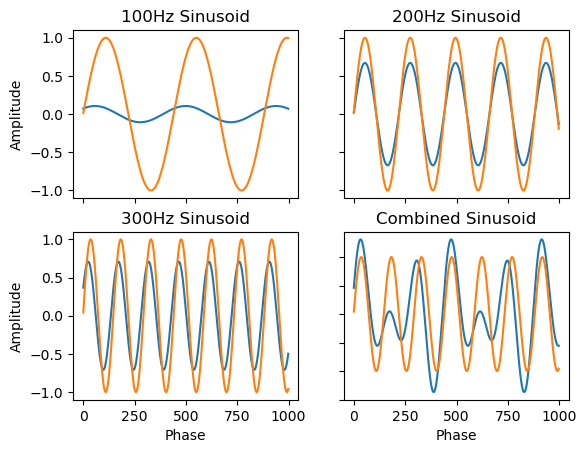

In [44]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np
import IPython.display as ipd
import random

# generate a discrete time sinusoidal signal with a specified frequency and duration
def sinusoid(freq=440.0, dur=1.0, srate=44100.0, amp=1.0, phase = 0.0): 
    t = np.linspace(0,dur,int(srate*dur))
    data = amp * np.sin(2*np.pi*freq *t+phase)
    return data

def peak_amplitude(data): 
    return np.max(data)

def dot_amplitude(data1, data2): 
    dot_product = np.dot(data1, data2)
    return 2 * (dot_product / len(data1))

data = sinusoid(100, 0.5, amp = random.uniform(0,1),phase =random.uniform(0,1))
basis = sinusoid(100, 0.5, amp = 1)
data2 = sinusoid(200, 0.5, amp = random.uniform(0,1),phase =random.uniform(0,1))
basis2 = sinusoid(200, 0.5, amp = 1)
data3 = sinusoid(300, 0.5, amp = random.uniform(0,1),phase =random.uniform(0,1))
basis3 = sinusoid(300, 0.5, amp = 1)
dataC = sinusoid(300, 0.5, amp = random.uniform(0,1)*3, phase = random.uniform(0,1)*3)
dataC = data + data2 + data3
basisC = sinusoid(300, 0.5, amp = 1)
print('Dot product amplitude of 100Hz = %2.2f' % dot_amplitude(data, basis))
print('Dot product amplitude of 200Hz = %2.2f' % dot_amplitude(data2, basis2))
print('Dot product amplitude of 300Hz = %2.2f' % dot_amplitude(data3, basis3))
print('Dot product amplitude of combined sinusoid = %2.2f' % dot_amplitude(dataC, basisC))



fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(data[1:1000])
axs[0, 0].plot(basis[1:1000])
axs[0, 0].set_title('100Hz Sinusoid')
axs[0, 1].plot(data2[1:1000])
axs[0, 1].plot(basis2[1:1000])
axs[0, 1].set_title('200Hz Sinusoid')
axs[1, 0].plot(data3[1:1000])
axs[1, 0].plot(basis3[1:1000])
axs[1, 0].set_title('300Hz Sinusoid')
axs[1, 1].plot(dataC[1:1000])
axs[1, 1].plot(basisC[1:1000])
axs[1, 1].set_title('Combined Sinusoid')

for ax in axs.flat:
    ax.set(xlabel='Phase', ylabel='Amplitude')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()


In [13]:
import matplotlib.pyplot as plt
from time import sleep, time, localtime

# Constant are CAPitalized in python by convention
from cmath import  pi as PI, e as E
# correcting python notations j => I  
I = complex("j")

# maplotlib does not plot lines using the classical
# (x0,y0), (x1,y1) convention
# but prefers (x0,x1) (y0,y1)
to_xx_yy = lambda c1,c2 : [(c1.real, c2.real), (c1.imag, c2.imag)] 

# black magic
plt.ion()
plt.show()

# fixing the weired / behaviour in python 2 by forcing cast in float
# 2 * PI = one full turn in radians (SI) second makes a
# 60th of a turn per seconds
# an arc is a fraction of turn
rad_per_sec = 2.0 * PI /60.0
# 60 times slower
rad_per_min = rad_per_sec / 60
# wall clock are not on 24 based because human tends to
# know if noon is passed
rad_per_hour = rad_per_min / 12

# I == rectangular coordonate (0,1) in complex notation
origin_vector_hand = I

size_of_sec_hand = .9
size_of_min_hand = .8
size_of_hour_hand = .6

# Euler's Formula is used to compute the rotation
# using units in names to check unit consistency
# rotation is clockwise (hence the minus)
# Euler formular requires a measure of angle (rad)
rot_sec = lambda sec : E ** (-I * sec * rad_per_sec )
rot_min = lambda min : E ** (-I *  min * rad_per_min )
rot_hour = lambda hour : E ** (-I * hour * rad_per_hour )

# drawing the ticks and making them different every
# division of 5
for n in range(60):
    plt.plot(
        *to_xx_yy(
            origin_vector_hand * rot_sec(n),
            .95 * I * rot_sec(n)
        )+[n% 5 and 'b-' or 'k-'],
        lw= n% 5 and 1 or 2
    )
    plt.draw()
# computing the offset between the EPOCH and the local political convention of time
diff_offset_in_sec = (time() % (24*3600)) - localtime()[3]*3600 -localtime()[4] * 60.0 - localtime()[5]   
n=0

while True:
    n+=1
    t = time()
    # sexagesimal base conversion
    s= t%60
    m = m_in_sec = t%(60 * 60)
    h = h_in_sec = (t- diff_offset_in_sec)%(24*60*60)
    # applying a rotation AND and homothetia for the vectors expressent as (complex1, ccomplex2)
    # using the * operator of complex algebrae to do the job
    l = plt.plot( *to_xx_yy(
            -.1 * origin_vector_hand * rot_sec(s),
            size_of_sec_hand * origin_vector_hand * rot_sec(s)) + ['g']  )
    j = plt.plot( *to_xx_yy(0, size_of_min_hand * origin_vector_hand * rot_min( m )) + ['y-'] , lw= 3)
    plt.pause(.1)
    ## black magic : remove elements on the canvas.
    l.pop().remove()
    j.pop().remove()
    k.pop().remove()
    if not n % 1000:
        ### conversion in sexagesimal base
        print(h/60.0/60.0)
        print(m/60.0)
        print(s)
    if n == 100:
        n=0

KeyboardInterrupt: 

In [51]:
# %matplotlib notebook 
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd
def harmonics(fundamental=440.0, dur=1.0, srate=44100.0, amps = [1.0]):
    # normalize amps 
    amps = amps / np.sum(amps)
    t = np.linspace(0, dur, int(srate*dur))
    data = np.zeros(len(t))
    for (i,a) in enumerate(amps): 
        hfreq = (i+1) * fundamental
        data += a * np.sin(2*np.pi* hfreq *t)
    return data

def interval(freq1): 
    amps = [1.0, 0.5, 0.25]
    data = []
    modifier = 0
    for i in range(0,12):
        data.append(harmonics(freq1+modifier,dur=1.0,amps=amps))
        modifier += (110/12)
    sum_data = 0
    for i in range(0,len(data)):
        sum_data  = sum_data + data[i]
    
    returndata = np.hstack(data[i] for i in range(0,12))
   
    return returndata

srate = 44100
ipd.display(ipd.Audio(interval(110), rate=srate))   


/tmp/ipykernel_338886/229010671.py:26: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  returndata = np.hstack(data[i] for i in range(0,12))
